In [2]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [3]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [4]:
NUM_CLASSES = 7

# Dataset reading

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [10]:
model.summary()
# tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 7)                 77        
                                                                 
Total params: 1147 (4.48 KB)
Trainable params: 1147 (4.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [ ]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [ ]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


23/30 [======================>.......] - ETA: 0s - loss: 1.7897 - accuracy: 0.1793 
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
30/30 [==============================] - 2s 11ms/step - loss: 1.7655 - accuracy: 0.1952 - val_loss: 1.6124 - val_accuracy: 0.3483
Epoch 2/1000
22/30 [=====================>........] - ETA: 0s - loss: 1.6105 - accuracy: 0.3026
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
30/30 [==============================] - 0s 5ms/step - loss: 1.5958 - accuracy: 0.3076 - val_loss: 1.4641 - val_accuracy: 0.3776
Epoch 3/1000
 1/30 [>.............................] - ETA: 0s - loss: 1.5199 - accuracy: 0.3125

/home/chuptani/.conda/envs/hgrm/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


22/30 [=====================>........] - ETA: 0s - loss: 1.5022 - accuracy: 0.3391
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
30/30 [==============================] - 0s 5ms/step - loss: 1.4799 - accuracy: 0.3569 - val_loss: 1.3330 - val_accuracy: 0.4818
Epoch 4/1000
19/30 [==================>...........] - ETA: 0s - loss: 1.3987 - accuracy: 0.4108
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
30/30 [==============================] - 0s 5ms/step - loss: 1.3965 - accuracy: 0.4119 - val_loss: 1.2336 - val_accuracy: 0.6027
Epoch 5/1000
23/30 [======================>.......] - ETA: 0s - loss: 1.3200 - accuracy: 0.4582
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
30/30 [==============================] - 0s 5ms/step - loss: 1.3078 - accuracy: 0.4643 - val_loss: 1.1550 - val_accuracy: 0.6319
Epoch 6/1000
23/30 [======================>.......] - ETA: 0s - loss: 1.2616 - accuracy: 0.4851
Epoch 6: savin

In [ ]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 4ms/step - loss: 0.2105 - accuracy: 0.9637


In [ ]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [ ]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 109ms/step
[9.8407114e-01 1.5317195e-02 5.1437796e-04 9.2514063e-05 4.8370759e-07
 4.2598249e-06]
0


# Confusion matrix

40/40 [==============================] - 0s 2ms/step


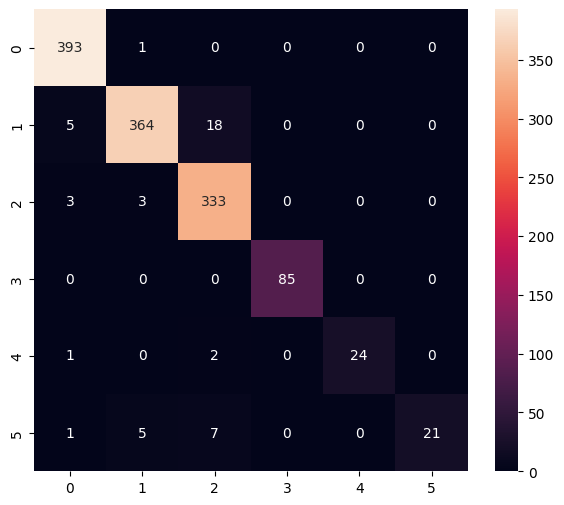

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       394
           1       0.98      0.94      0.96       387
           2       0.93      0.98      0.95       339
           3       1.00      1.00      1.00        85
           4       1.00      0.89      0.94        27
           5       1.00      0.62      0.76        34

    accuracy                           0.96      1266
   macro avg       0.98      0.90      0.93      1266
weighted avg       0.96      0.96      0.96      1266



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [ ]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

/home/chuptani/.conda/envs/hgrm/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmp4dsxya9i/assets


INFO:tensorflow:Assets written to: /tmp/tmp4dsxya9i/assets
2024-01-29 21:43:52.795215: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-01-29 21:43:52.795268: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-01-29 21:43:52.795554: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmp4dsxya9i
2024-01-29 21:43:52.796662: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-01-29 21:43:52.796679: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmp4dsxya9i
2024-01-29 21:43:52.799820: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-01-29 21:43:52.866327: I tensorflow/cc/saved_model/loader.cc:217] Running initialization op on SavedModel bundle at path: /tmp/tmp4dsxya9i
2024-01-29 21:43:52.892050: I tensorflow/cc/saved_model/loader.cc:316] SavedModel

6660

# Inference test

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 285 µs, sys: 21 µs, total: 306 µs
Wall time: 249 µs


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.8407114e-01 1.5317195e-02 5.1437813e-04 9.2514245e-05 4.8370759e-07
 4.2598244e-06]
0
